# Planning Telescope observation

p(clear tomorrow|cloudy today) = 0.5\
p(cloudy tomorrow|cloudy today) = 0.5\
p(cloudy tomorrow|clear today) = 0.1\
p(clear tomorrow|clear today) = 0.9

Tasks
- Start off on a cloud day.
- Implement your weather forecast based on the above p probabilities
- Run your simulator for N days (with $N\geq 10^{4}$)
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a trace-plot, showing how our estimate of p(clear) evolves as the chain samples.
- Prepare a histogram of the above plot. This reveals the distribution of p(clear).
- Use a summary statistics to determine the most likely value and an error on our estimate.

In [1]:
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks")
from Utilities import plot_settings
import numpy as np
import matplotlib.pyplot as plt

$0 \to cloudy$\
$1 \to clear$

In [10]:
def get_weather(w_in):    
    
    if w_in==0:
        w_out = float(np.random.choice(2, 1, p=[0.5,0.5])[0]) # if the weather today is crap, we get 50-50 chance for it to be clear/cloudy tomorrow
    else:
        w_out = float(np.random.choice(2, 1, p=[0.1,0.9])[0]) # if the weather today is cool, we get 10-90 chance for it to be cloudy/clear tomorrow
    
    return w_out

In [11]:
N = int(1e5) # Number of days weather to be predicted

In [12]:
forecast = np.zeros(N)

In [13]:
for i in range(forecast.size-1):
    forecast[i+1] = get_weather(forecast[i])

Checking result

In [16]:
cumulative_clear = np.cumsum(forecast)
fraction_clear = cumulative_clear / np.arange(1, N + 1)

In [17]:
p_cloudy = forecast[forecast<1].size/N
print(f'p(cloudy) = {p_cloudy}')
p_clear  = forecast[forecast>0].size/N
print(f'p(clear)  = {p_clear}')

p(cloudy) = 0.16593
p(clear)  = 0.83407


These are just the right probabilities!\
Let's look at the trace plot

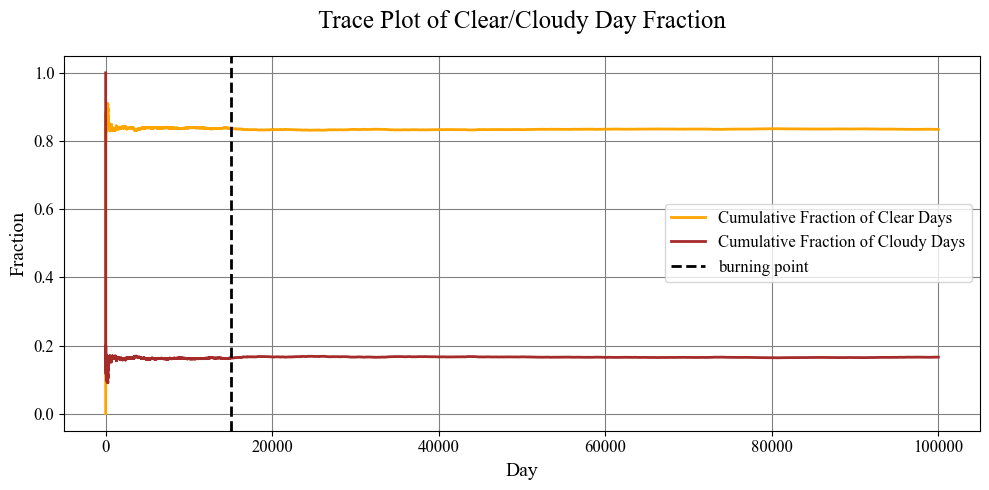

In [32]:
plt.plot(fraction_clear, lw=2, color='orange' ,label='Cumulative Fraction of Clear Days')
plt.plot(1-fraction_clear, lw=2, color='brown' ,label='Cumulative Fraction of Cloudy Days')
plt.xlabel('Day')
plt.ylabel('Fraction')
plt.title('Trace Plot of Clear/Cloudy Day Fraction')
plt.axvline(15000, 0, 1, linestyle='--', color='black', label='burning point')
plt.legend()

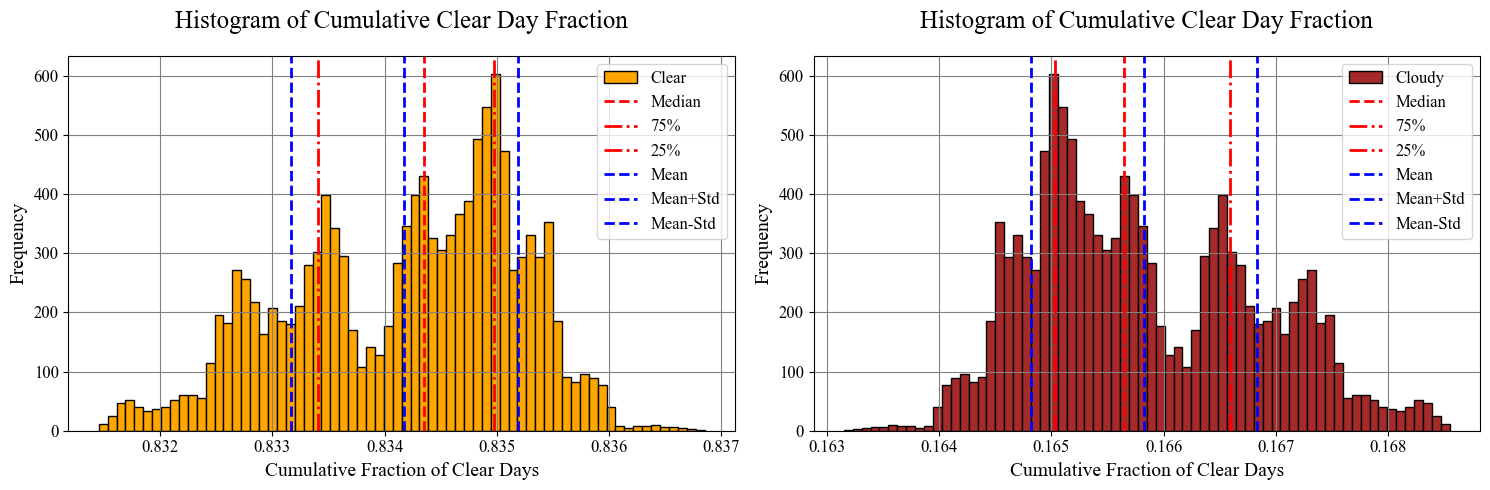

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
clear_counts, clear_bins, _ = plt.hist(fraction_clear[15000:], bins='scott', density=True, color='orange', edgecolor='black', alpha=1, label='Clear')
plt.axvline(np.median(fraction_clear[15000:]), 0, 1, linestyle='--', lw=2, color='red', label='Median')
plt.axvline(np.quantile(fraction_clear[15000:], 0.75), 0, 1, linestyle='-.', lw=2, color='red', label='75%')
plt.axvline(np.quantile(fraction_clear[15000:], 0.25), 0, 1, linestyle='-.', lw=2, color='red', label='25%')
plt.axvline(np.mean(fraction_clear[15000:]), 0, 1, linestyle='--', lw=2, color='blue', label='Mean')
plt.axvline(np.mean(fraction_clear[15000:])+np.std(fraction_clear[15000:]), 0, 1, linestyle='--', lw=2, color='blue', label='Mean+Std')
plt.axvline(np.mean(fraction_clear[15000:])-np.std(fraction_clear[15000:]), 0, 1, linestyle='--', lw=2, color='blue', label='Mean-Std')
plt.xlabel('Cumulative Fraction of Clear Days')
plt.ylabel('Frequency')
plt.title('Histogram of Cumulative Clear Day Fraction')
plt.legend()

plt.subplot(1, 2, 2)
cloudy_counts, cloudy_bins, _ = plt.hist((1-fraction_clear)[15000:], bins='scott', density=True, color='brown', edgecolor='black', alpha=1, label='Cloudy')
cloudy = 1- fraction_clear[15000:]
plt.axvline(np.median(cloudy), 0, 1, linestyle='--', lw=2, color='red', label='Median')
plt.axvline(np.quantile(cloudy, 0.75), 0, 1, linestyle='-.', lw=2, color='red', label='75%')
plt.axvline(np.quantile(cloudy, 0.25), 0, 1, linestyle='-.', lw=2, color='red', label='25%')
plt.axvline(np.mean(cloudy), 0, 1, linestyle='--', lw=2, color='blue', label='Mean')
plt.axvline(np.mean(cloudy)+np.std(cloudy), 0, 1, linestyle='--', lw=2, color='blue', label='Mean+Std')
plt.axvline(np.mean(cloudy)-np.std(cloudy), 0, 1, linestyle='--', lw=2, color='blue', label='Mean-Std')
plt.xlabel('Cumulative Fraction of Clear Days')
plt.ylabel('Frequency')
plt.title('Histogram of Cumulative Cloudy Day Fraction')
plt.legend()

In [31]:
# Summary statistics
final_estimate = np.median(fraction_clear[15000:])
q75 = np.quantile(fraction_clear[15000:], 0.75)
q25 = np.quantile(fraction_clear[15000:], 0.25)
print(f"75% quantile: {q75:.3f}")
print(f"25% quantile: {q25:.3f}")
print(f"Median estimate of clear days: {final_estimate:.3f} +/- {(q75 - q25)/1.349:.3f}")

75% quantile: 0.835
25% quantile: 0.833
Median estimate of clear days: 0.834 +/- 0.001


Bootstrap estimation

In [21]:
sample = fraction_clear[15000:]

In [22]:
N_resampled = 10000
means = np.zeros(N_resampled)

# Bootstrap resampling
for i in range(N_resampled):
    resample = np.random.choice(sample, size=sample.size, replace=True)
    means[i] = np.mean(resample)

In [23]:
print(f"Bootstrap mean estimate of clear days: {means.mean():.3f} +/- {means.std():.3e}")

Bootstrap mean estimate of clear days: 0.834 +/- 3.494e-06
